In [2]:
# -*- coding: utf-8 -*-
import math
import random
import matplotlib.pyplot as plt

In [3]:
ray_star = 2
densite_star = 3
n = 2000
time = 150

In [4]:
def etoile(ray_star,densite_star):
    "définit la taille et la masse de l'etoile par rapport au soleil en fonction de la densité massique"
    R = ray_star*(7*10**4)
    M = (densite_star * (math.pi)/6) * (R**3)
    return (R,M)

In [5]:
def disque_accretion(ray_star,densite_star):
    R,_=etoile(ray_star,densite_star)
    ray_min=1*R
    ray_max=5*R
    return (ray_min, ray_max)

densite = 3e12 #kg/km^3 densite des planetesimaux

In [6]:
def one_simal_taille():
    taille = random.randint(10,50)
    return taille

In [7]:
def one_simal_pos_init(ray_min, ray_max):
    x = random.randint(1, 1000000) * random.choice([-1, 1]) #position sur l axe x
    y = random.randint(1, 1000000) * random.choice([-1, 1]) #position sur l axe y

    while math.sqrt(x*x + y*y) > ray_max or math.sqrt(x*x + y*y) < ray_min:
        x = random.randint(1, 1000000) * random.choice([-1, 1])
        y = random.randint(1, 1000000) * random.choice([-1, 1])
    return (x,y)

In [8]:
def vitesse_one_simal(taille, pos):
    x, y = pos
    masse_simal = densite*(math.pi/6)*taille*taille*taille
    _, masse_star = etoile(ray_star,densite_star)
    G = 6.67*10**(-11)
    d = (x*x + y*y)**0.5
    v = (G*masse_star**2 / ((masse_simal + masse_star)*d))**0.5 / d
    return v

In [9]:
def simal_angle(pos):
    x, y = pos
    angle = 0
    if x > 0:
        angle = math.atan(y/x)
    elif x < 0:
        angle = math.pi + math.atan(y/x)
    elif x == 0 and y > 0:
        angle = math.pi/2
    elif x == 0 and y < 0:
        angle = 3*math.pi/2
    return angle

In [10]:
def one_simal_pos_next_time(pre, v, angle_pre):
    x, y = pre
    d = (x*x+y*y)**0.5

    angle = angle_pre + v

    x = math.cos(angle) * d
    y = math.sin(angle) * d
    return (x,y)

In [11]:
def all_simal_init(ray_min, ray_max):
    x, y = one_simal_pos_init(ray_min, ray_max)
    taille = one_simal_taille()
    angle_i = simal_angle((x,y))
    v = vitesse_one_simal(taille, (x, y))
    return (x, y, angle_i, v, taille)

In [12]:
def n_all_simal_init(n, ray_min, ray_max):
    list_n = list()
    for _ in range(n):
        list_n.append(all_simal_init(ray_min, ray_max))
    return list_n

In [13]:
ray_min, ray_max = disque_accretion(ray_star, densite_star)

list_n = n_all_simal_init(n, ray_min, ray_max)

list_nb = list()
list_t = list()
list_moy_taille =list()

for t in range(time):
    taille_totale = 0
    for i in range(n):
        if list_n[i]:
            x, y, new_angle, v, taille = list_n[i]

            x, y = one_simal_pos_next_time((x,y), v, new_angle)
            new_angle = simal_angle((x,y))

            list_n[i] = (x, y, new_angle, v, taille)
            
            taille_totale = taille_totale + taille
                
            for e in range(n):
                if e != i and list_n[e]:
                    x_n, y_n, _, _, taille_n= list_n[e]

                    if abs(x - x_n) <= 200*(taille) and abs(y - y_n) <= 200*(taille):
                        taille_c = taille_n + taille
                        if taille >= taille_n:
                            x_c = x
                            y_c = y
                        else:
                            x_c = x_n
                            y_c = y_n

                        v_c = vitesse_one_simal(taille_c, (x_c, y_c) )   
                        new_angle_c = simal_angle((x_c,y_c))
                        list_n[i] = (x_c, y_c, new_angle_c, v_c, taille_c)
                        list_n[e] = None
                        
    L = [a for a in list_n if a != None]
    list_nb.append(len(L))
    
    list_moy_taille.append(taille_totale/len(L))

list_t = [t for t in range(time)]

p=0
for o in list_n:
    if o:
        _,_,_,_,taille=o
        if taille>= 1000:
            p=p+1
        
print ('nombre de planètes =')
print (p)

nombre de planètes =
3


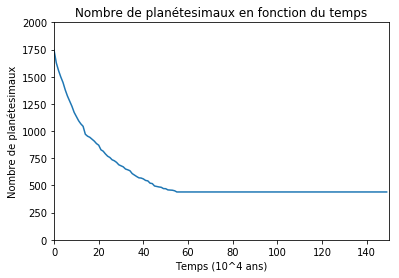

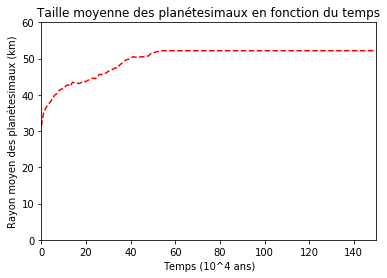

In [16]:
plt.xlabel('Temps (10^4 ans)')
plt.ylabel('Nombre de planétesimaux')
plt.title('Nombre de planétesimaux en fonction du temps')
plt.plot(list_t, list_nb)
plt.axis([0, time, 0, n])
plt.show()

plt.xlabel('Temps (10^4 ans)')
plt.ylabel('Rayon moyen des planétesimaux (km)')
plt.title('Taille moyenne des planétesimaux en fonction du temps')
plt.plot(list_t, list_moy_taille,'r--')
plt.axis([0, time,0,60])
plt.show()
